# Boolean Search

## input source file
A 100,000 news titles csv file in Chinese. Including some English phrases.

## query file
A txt file with 11 queries.
```
川普 and 美國                                                                               
電玩 and 宅男
美國 and 北韓
美國 or 台灣 or 中國
母親節 and 禮物
職籃 or 職棒
蔡英文 and 美國
台灣 and GDP 
川普 not 美國
NBA or MLB 
NBA and 大三元
```

## Brutal method
The Brutal method first came to my mind. The strategy is below:
1. read in all source title and put it in dictionary
2. parse query
3. search every term through title dictionary
4. merge results depends on different operations


### library

In [1]:
import pandas                                                                               
import numpy as np
import time

### read files

I also use time package to measure the time of building a search engine.
But in brutal method it's just reading files.

In [3]:
# load source data, build search engine
start = time.time()
source = pandas.read_csv("source.csv", header=None, names=["num", "title"], dtype={"num": np.int})
source = source.set_index("num")["title"].to_dict()
print("Build time: ", time.time() - start, " sec")

# compute query result
query = pandas.read_csv("query.txt", header=None, names=["query"])
query = query["query"].tolist() 

Build time:  0.18005633354187012  sec


### search all title 
This function is to find out the number of title that includes the query term.

In [4]:
def search_title(source, query):
    ret = []                                                                                
    for i in range(1, len(source)):
        if source[i].find(query) != -1:
            ret.append(i)
    return ret

### merge query results
This is to get the final answers of each query.

In [5]:
def get_response(source, query):
    q = query.split()
    opt = q[1]
    result = []
    ans = []
    for i in range(0, len(q)):
        if i % 2 == 0:
            result.append(search_title(source, q[i]))
    ans = result[0]

    if opt == "and":
        for l in range(1, len(result)):
            for a in ans[:]:
                if a not in result[l]:
                    ans.remove(a)
    elif opt == "or":
        for j in range(1, len(result)):
            ans = ans + result[j]
        ans = sorted(list(set(ans)))
    else:
        for l in range(1, len(result)):
            for a in ans[:]:
                if a in result[l]:
                    ans.remove(a)
    return ans

### Brutal method results

In [7]:
with open("output.txt", 'w') as output_file:
        start = time.time()
        for i in range(0, len(query)):
            if i != 0:
                output_file.write("\n")
            result = get_response(source, query[i])
            if len(result) == 0:
                output_file.write("0");
            else:
                output_file.write(",".join(str(x) for x in result))
        print("Search time: ", time.time() - start, " sec")

Search time:  0.6353840827941895  sec


I choose dictionary as my data structure. Since dictionary has been implemented with hash function, thus no matter is append or search time only take O(1) time complexity for best case if the hash disturibution is great.
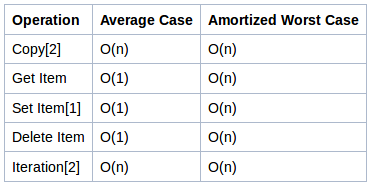

## Jieba

After implemented jieba to parse phrases. Jieba takes a long time to parse phrases thus I didn't pick to use this method in our class competition.
